# Week 8: Quantum Gravity



Last week we have seen the first application of Monte Carlo techniques to Quantum Field Theory (QFT). In the case of scalar fields in $d$-dimensional Minkowski space (we only treated the case $d=4$ last week, but let us be a bit more general now), this involved several steps:
* **Wick rotation**: First we had to shift our attention to the corresponding Euclidean Quantum Field Theory (EQFT) of scalar fields on $d$-dimensional Euclidean space, formally obtained by a Wick rotation in which the time coordinate $t$ of Minkowski space is analytically continued to an imaginary time $\tau$. The path integral associated to the EQFT took the form
$$Z = \int [\mathcal{D}\phi] e^{-\frac{1}{\hbar}S_E[\phi]},$$
where the formal functional integral is over all field configurations $\phi$ on $d$-dimensional Euclidean space. We observed that the Euclidean action $S_E[\phi]$ is real and bounded below, which suggests that one may be able to interpret the path integral as a statistical partition function in which each field configuration $\phi$ appears with probability proportional to $e^{-\frac{1}{\hbar}S_E[\phi]}$.
* **Lattice discretization**: To make sense of such a probability distribution and to have hopes of simulating the statistical system, the field theory is turned into a Lattice Field Theory (LFT) by discretizing the continuous scalar field $\phi:\mathbb{R}^d \to \mathbb{R}$ into a field $\varphi: \Lambda \to \mathbb{R}$ on a $d$-dimensional lattice $\Lambda \subset \mathbb{R}^d$. 
* **Statistical interpretation**: This way one obtains a lattice partition function
$$Z_\Lambda = \int \Big[\prod_{x\in\Lambda} \mathrm{d}\varphi(x)\Big] e^{-S_L[\varphi]}.$$
Assuming that the finite-dimensional integral converges, which it does in the case of the potential considered last week, it literally defines a probability density $e^{-S_L[\varphi]} / Z$ on field configurations (i.e. on $\mathbb{R}^{|\Lambda|}$) and therefore a well-defined statistical system.
* **MCMC**: Then one can use the Markov Chain Monte Carlo techniques that we have developed throughout the course to sample from this distribution and measure expectation values of field observables.
* **Continuum limit**: To approach the original EQFT one has to investigate the continuum limit of the LFT, which involves increasing the lattice size while decreasing the physical lattice spacing. We have argued that the latter is only possible if the lattice field theory approaches criticality, e.g. close to a continuous phase transition.

It is worth emphasizing that the first two steps can in general not be made mathematically precise, because they operate at the level of the purely formal infinite-dimensional path integral (from QFT courses we only know how to treat free fields and perturbation theory). Instead those steps should be viewed as guiding principles to motivate the introduction of particular lattice field theories. The latter have a mathematically well-defined basis, as they simply amount to probability distributions on finite-dimensional spaces. Hence, the really non-trivial part resides in the last point: the continuum limit. As the size $w$ of the lattice increases and the lattice spacing $a \sim 1/w$ decreases, does there exist a choice of couplings as function of $w$ such that the important observables, like (properly normalized) correlation functions of the fields, converge as $w\to\infty$? If we could mathematically prove that this is the case, we could take the limit as our definition of the EQFT! For most field theories of physical interest such a proof is still out of reach (solving it in the case of Yang-Mills theory will [make you a millionaire](https://en.wikipedia.org/wiki/Yang%E2%80%93Mills_existence_and_mass_gap)), but that should not stop us from taking the numerical approach. Monte Carlo simulations can provide numerical evidence for the existence of a continuum limit as well as estimates of observables in this limit by extrapolating measurements at increasing lattice sizes.

There is a lot more to say about the conceptual and practical problems of Lattice Field Theory, but unfortunately we do not have time to delve into this during the lectures. However, at this point you should be well equipped to pick up a text book, for instance, on Lattice QCD and to understand the steps necessary to get to physical predictions. This week we focus on a different family of lattice models relevant to the problem of quantum gravity.

## Path integrals in Quantum Gravity

All experiments so far involving interactions with gravity, think of gravitational wave observations and measurements of the cosmological microwave background, are consistent with Einstein's theory of general relativity, in which the geometry of spacetime is governed by a set of dynamical equations. It is a purely classical theory in which the matter content together with initial conditions on the geometry at some initial time, fully determines the spacetime metric $g_{\mu\nu}(x)$ at later times up to an irrelevant choice of coordinates. Such a deterministic evolution is at odds with the fundamental quantum nature of matter fields that interact with the spacetime metric. It is thus generally expected that general relativity is merely the classical limit of a fundamentally quantum theory of gravity. The reason why we have not witnessed effects of this quantum nature yet is that based on dimensional analysis the length scale below which one expects quantum fluctuations in the metric to become important is given by the **Planck length** $\ell_{\mathrm{P}} = \sqrt{\frac{\hbar G}{c^2}} \approx 1.6\cdot 10^{-35}\mathrm{m}$, which is about a factor $10^{20}$ smaller than the diameter of a proton. Such length scales are still far beyond the reach of particle accelerators and other experimental setups, making direct detections of quantum-gravitational effects very difficult.

The lack of experimental input is one of the difficulties in selecting appropriate models of quantum gravity. Another problem is that the QFT techniques that have been so successful in making predictions for the other fundamental forces (in the Standard Model of particle physics) run into problems when applied to the gravitational force. The reason is that gravity is **perturbatively non-renormalizable**. Let me briefly explain this. When performing perturbation theory in a QFT one necessarily encounters infinities when integrating over the momenta in Feynman diagrams. These infinities can be absorbed by introducing counter-terms in the action, each carrying an associated coupling that needs to be determined experimentally. The problem in the case of gravity is that at every order of perturbation theory new counter-terms are required. To fully characterize the QFT one should in principle determine an infinite number of couplings from experiment, which is an unsatisfactory situation if you like your model to be predictive. Does this by itself mean that we should not aim to treat gravity as a QFT? No, it is telling us that perturbation theory, in which the metric $g_{\mu\nu}(x) = \eta_{\mu\nu} + h_{\mu\nu}(x)$ is expanded as a perturbation $h_{\mu\nu}(x)$ around flat Minkowski space $\eta_{\mu\nu}$, may not be the most economical approach to formulate the model at arbitrarily short length scales. Instead a **non-perturbative** approach may be necessary.

In the case of scalar field theory we have argued that the transition to a lattice version allows for a non-perturbative treatment, because the fields $\varphi(x)$ on the lattice sites are in no way constrained to be small. It is thus natural to seek a similar discretization of the spacetime metric appearing in the tentative QFT of gravity. There is, however, a conceptual difference between scalar field theory and general relativity. The scalar field lives on a fixed background geometry in the form of Minkowski space, while in general relativity the metric itself describes the geometry on which it lives. This has important consequences for the first two steps in programme outlined above: the Wick rotation and the lattice discretization.

### Wick rotation

It is not clear, even at a purely formal level, what a Wick rotation entails in general relativity. An important aspect of general relativity is that one is completely free in choosing coordinates on spacetime. Unless the geometry is highly symmetric, this means in particular that there is no preferred notion of time coordinate $t$ and therefore it is not clear what it means to analytically continue the real time $t$ to imaginary time $\tau$. This is not necessarily a deal breaker, because, as emphasized above, the Wick rotation should only be viewed as a guiding principle anyway. It guides the choice of a Euclidean Quantum Field Theory that shares properties with its real time counterpart. In the case of general relativity a natural proposal for the path integral and its Euclidean version are
$$\mathcal{Z} = \int [\mathcal{D}g_{\mu\nu}] e^{\frac{i}{\hbar}S[g_{\mu\nu}]}, \qquad Z = \int [\mathcal{D}g_{ab}] e^{-\frac{1}{\hbar}S_{E}[g_{ab}]}$$
where the first functional integral is over all (Lorentzian) metrics of signature $(d-1,1)$, i.e. metrics that are locally $d$-dimensional Minkowski space, while the integral in the Euclidean path integral is over (Riemannian) metrics of signature $(4,0)$ corresponding to locally $d$-dimensional Euclidean geometry. A natural choice of action is the classical action that gives rise upon variation to the Einstein equations, i.e. the **Einstein-Hilbert action** and its Euclidean counter part
$$S[g_{\mu\nu}] = \frac{c^4}{16\pi G} \int \mathrm{d}^dx \sqrt{-g} (R-2\Lambda), \qquad S_E[g_{ab}] = \frac{c^4}{16\pi G} \int \mathrm{d}^dx \sqrt{g}(-R+2\Lambda),$$
where $g$ and $R_g$ are the determinant and Ricci curvature scalar of the $d\times d$ matrix $g_{\mu\nu}$ respectively $g_{ab}$. There are two free parameters in the model: Newton's constant $G$ and the cosmological constant $\Lambda$. The Euclidean path integral $Z$ stands a chance of having a statistical interpretation since $e^{-\frac{1}{\hbar}S_{E}[g_{ab}]}$ is always real and positive. The situation is not as nice as in the scalar field case though, because $S_E[g_{ab}]$ is not bounded below: the classical solutions are saddle points of $S_E[g_{ab}]$, not minima as in the scalar field case. Whether the path integral can be rendered finite, despite featuring an integrand $e^{-\frac{1}{\hbar}S_{E}[g_{ab}]}$ that can be arbitrarily large, is not something one can decide based on purely formal grounds.

### Lattice discretization: Dynamical Triangulations

In the case of Euclidean scalar field theory constructing a lattice discretization was relatively straightforward. Since the scalar field was living on a fixed Euclidean geometry, we chose to approximate this geometry by a regular lattice with a fixed distance $a$ between the lattice sites and to only record the scalar field at these sites. In the Euclidean gravity context, we have no fixed Euclidean background that we can replace by a lattice. Of course we could fix a choice of $d$ coordinates for our metrics and consider an ad hoc regular lattice in these coordinates. But this has two unpleasant consequences. First, this breaks the symmetry of general relativity that says that all  coordinate systems should be treated equally. Second, the distance between neighboring lattice sites is not a parameter one can set, but is a dynamical quantity itself as it depends on the metric $g_{ab}$ at those sites. This means that, without imposing further restrictions on the metric, introducing a lattice in coordinate space does not introduce a minimal length scale at all, like it did in the scalar field case. 

<div>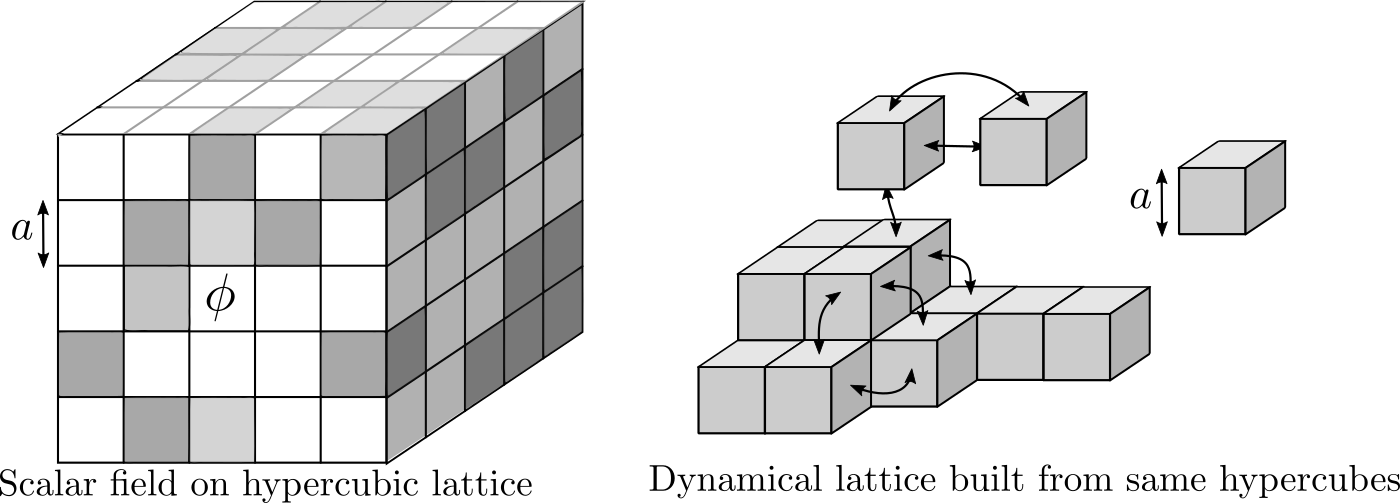</div>

One way to deal with this problem goes under the name of **Dynamical Triangulations**. It takes the idea seriously that the regular hypercubic lattice in ordinary Lattice Field Theory really is a discretization of the flat Euclidean geometry on which the field lives: the field configuration is in a sense built from assembling a large number of elementary hypercubes, each carrying a scalar field value, in a regular grid. Since in general relativity spacetime itself is dynamical, it is natural that in a lattice discretization of the model the lattice structure itself becomes dynamical. One could start with the same elementary building blocks, each representing a hypercube of side length $a$ in $d$-dimensional Euclidean space, but assembling them in a non-regular fashion, thereby producing lattices with very different geometries. In practice, instead of using the hypercube (square in $d=2$, cube in $d=3$, ...) it is more convenient to use a $d$-simplex (triangle in $d=2$, tetrahedron in $d=3$, ...) with fixed side length $a$ as the elementary building block. In order to specify a geometry built from $N$ simplices it is sufficient to specify how the $(d+1)N$ sides of the $N$ simplices are glued together, i.e. how the sides are paired and how each pair is oriented.

<div>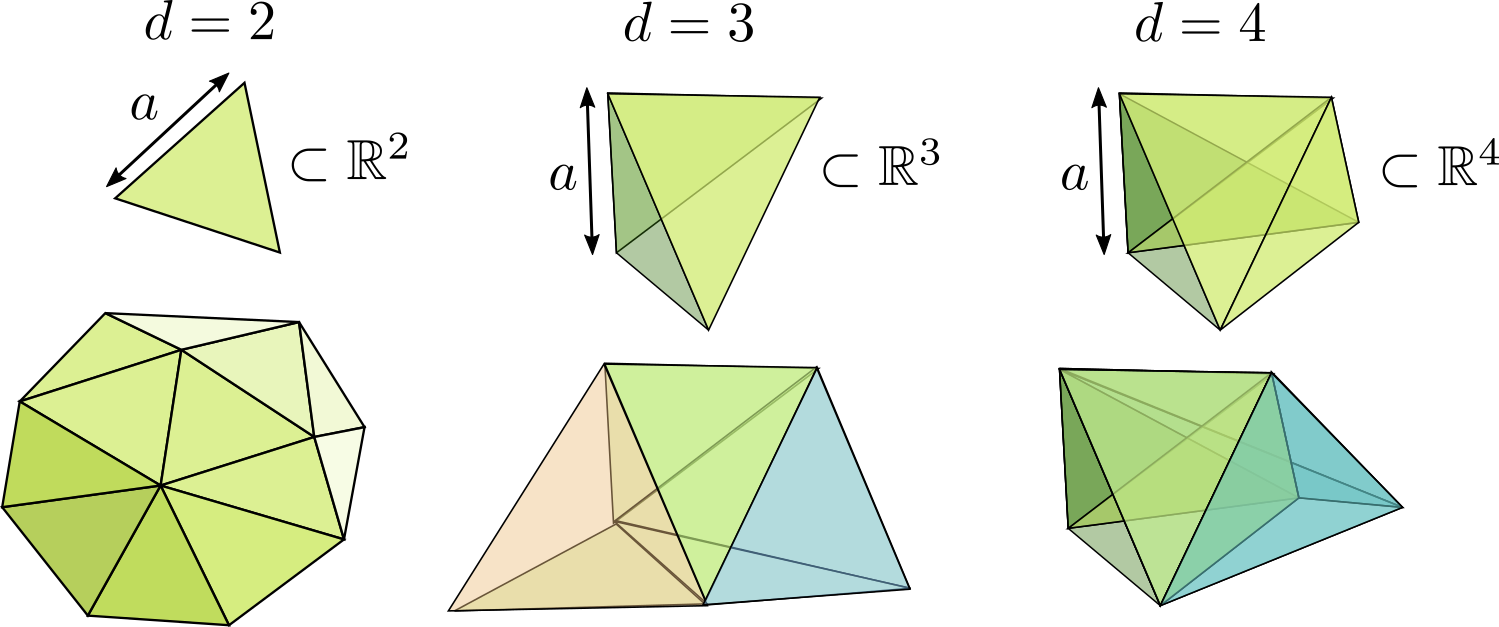</div>

A **triangulation** of size $N$ of a $d$-dimensional manifold $\mathcal{M}$ is a gluing of $N$ identical $d$-simplices such that the resulting geometry has the same topology as $\mathcal{M}$. For instance, a triangulation of the $2$-sphere is a gluing of $N$ equilateral triangles, such that the resulting surface is connected, has no boundaries and no handles. The intuitive idea is now that the geometry corresponding to any metric $g_{ab}$ on the manifold $\mathcal{M}$ can be approximated well (in some sense) by a triangulation of sufficiently large size $N$ and sufficiently small side length $a$. It is then natural to discretize the path integral $Z$ by replacing the functional integral over metrics by a summation over all triangulations,
$$ Z = \int [\mathcal{D}g_{ab}] e^{-\frac{1}{\hbar}S_{E}[g_{ab}]} \quad\longrightarrow\quad Z_{\mathcal{M},N} = \sum_T e^{-S_{DT}[T]}.$$
Here the sum is over all triangulations $T$ of $\mathcal{M}$ of size $N$ and $S_{DT}[T]$ is an appropriate discretization of the Einstein-Hilbert action. The cosmological constant $\Lambda$ in the action $S_{E}[g_{ab}]$ simply multiplies the volume $\int \mathrm{d}^dx \sqrt{g}$ of the metric space, so a natural discrete counterpart is a term $\lambda N$ in the discrete action since each $d$-simplex contributes the same fixed volume, which can be absorbed into the defintion of the dimensionless cosmological constant $\lambda$. In $d=2$ the curvature integral $\int \mathrm{d}^2x\sqrt{g}R$ only depends on the topology of $\mathcal{M}$ and is thus independent of the metric (the [Gauss-Bonnet theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Bonnet_theorem)). Since we fix both $N$ and the topology in the discretized path integral, the action is constant, so the natural discretization is $S_{DT}[T] = 0$ in 2D! In $d=3$ and $d=4$ it can be shown that the integrated curvature in the piecewise flat geometry of a triangulation (knows as the **Regge action**) is linear in the number $N_0$ of vertices of the triangulation, so one naturally sets $S_{DT}[T] = -\kappa_0 N_0$.

## Monte Carlo simulation of 2D Dynamical Triangulations

Let us focus on the case $d=2$, i.e. on the toy model of quantum gravity in two spacetime dimensions, and take the spacetime manifold to be the 2-sphere $S^2$. To make the statistical system very precise let us discuss how a triangulation $T$ can be described succinctly (which helps when representing it on the computer). It should be constructed from $N$ equilateral triangles by pairwise gluing the $3N$ sides (note that $N$ should thus be even!). Let us label the triangles from $0$ to $N-1$ and label all sides from $0$ to $3N-1$, such that the triangle with label $i$ has sides with labels $3i, 3i+1, 3i+2$ in counter-clockwise direction. Then specifying the adjacency of sides amounts to specifying a permutation $\operatorname{adj}:\{0,\ldots,3N-1\}\to\{0,\ldots,3N-1\}$, which should satisfy $\operatorname{adj}(x)\neq x$ and $\operatorname{adj}(\operatorname{adj}(x))=x$ for all $x$ (i.e. it is a "fixed-point free involution"). For instance the following triangulation of $S^2$ is specified by the permutation 

$$0,1,2,3,4,5,6,7,8,9,10,11 \xrightarrow{\operatorname{adj}} 9,4,6,7,1,11,2,3,10,0,8,5.$$

<div>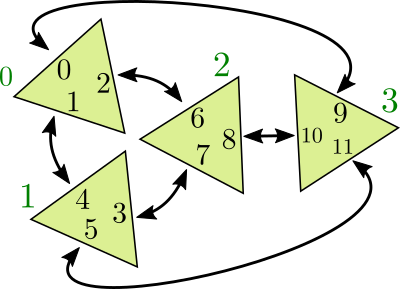</div>

We can store this information conveniently in an integer array.

In [12]:
import numpy as np
rng = np.random.default_rng()  
import matplotlib.pylab as plt
%matplotlib inline

example_adj = np.array([9,4,6,7,1,11,2,3,10,0,8,5],dtype=np.int32)

Representing a triangulation through its adjacency permutation, we can define the partition function of 2D dynamical triangulations of the $2$-sphere as
$$Z_{S^2,N} = \sum_T e^{-S_{DT}[T]} = \sum_T 1.$$
Therefore the desired probability distribution is the uniform distribution $\pi(T) = 1 / Z_{S^2,N}$ on the space of all triangulations of $S^2$ of size $N$. 

Let's use MCMC techniques to sample from this distribution! We first need a valid initial state of desired size $N$. Any valid triangulation will do. Here is one that is easy to code, resulting in a "fan-shaped" triangulation of the 2-sphere.

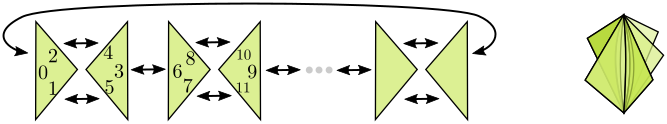

In [14]:
def fan_triangulation(n):
    '''Generates a fan-shaped triangulation of even size n.'''
    return np.array([[(i-3)%(3*n),i+5,i+4,(i+6)%(3*n),i+2,i+1] for i in range(0,3*n,6)],dtype=np.int32).flatten()

### Sanity checks

Although this section is not strictly necessary for the implementation of the simulations, it is very useful for debugging purposes to be able to check whether a permutation determines a valid triangulation of the sphere. First of all we need to make sure that it is a fixed-point free involution:

In [17]:
def is_fpf_involution(adj):
    '''Test whether adj defines a fixed-point free involution.'''
    for x, a in enumerate(adj):
        if a < 0 or a >= len(adj) or x == a or adj[a] != x:
            return False
    return True

print(is_fpf_involution(example_adj))
print(is_fpf_involution(fan_triangulation(50)))

True
True


This means it determines a proper closed surface, since each side of a triangle is glued to another side. But it could be that the surface has multiple connected components. So let us compute the number of components. 

In [18]:
from collections import deque 

def triangle_neighbours(adj,i):
    '''Return the indices of the three neighboring triangles.'''
    return [j//3 for j in adj[3*i:3*i+3]]

def connected_components(adj):
    '''Calculate the number of connected components of the triangulation.'''
    n = len(adj)//3   # the number of triangles
    component = np.full(n,-1,dtype=np.int32)   # array storing the component index of each triangle
    index = 0
    for i in range(n):
        if component[i] == -1:    # new component found, let us explore it
            component[i] = index
            queue = deque([i])   # use an exploration queue for breadth-first search
            while queue:
                for nbr in triangle_neighbours(adj,queue.pop()):
                    if component[nbr] == -1:  # the neighboring triangle has not been explored yet
                        component[nbr] = index
                        queue.appendleft(nbr)   # add it to the exploration queue
            index += 1
    return index

print(connected_components(example_adj))
print(connected_components(fan_triangulation(50)))

1
1


Finally, if we know that it has a single connected component, we can check that it has the topology of the sphere by verifying Euler's formula $V - E + F = 2$, where $V$, $E=3N/2$, $F=N$ are the number of vertices, edges and faces respectively. The number $V$ of vertices can be established by an exploration process. 

In [26]:
def next_around_triangle(i):
    '''Return the label of the side following side i in counter-clockwise direction.'''
    return i - i%3 + (i+1)%3

def prev_around_triangle(i):
    '''Return the label of the side preceding side i in counter-clockwise direction.'''
    return i - i%3 + (i-1)%3

def vertex_list(adj):
    '''
    Return the number of vertices and an array `vertex` of the same size as `adj`, 
    such that `vertex[i]` is the index of the vertex at the start (in ccw order) of the side labeled `i`.
    '''
    vertex = np.full(len(adj),-1,dtype=np.int32)  # a side i that have not been visited yet has vertex[i]==-1
    vert_index = 0  # 
    for i in range(len(adj)):
        if vertex[i] == -1:
            side = i
            while vertex[side] == -1:  # find all sides that share the same vertex
                vertex[side] = vert_index
                side = next_around_triangle(adj[side])
            vert_index += 1
    return vert_index, vertex

def number_of_vertices(adj):
    '''Calculate the number of vertices in the triangulation.'''
    return vertex_list(adj)[0]

def is_sphere_triangulation(adj):
    '''Test whether adj defines a triangulation of the 2-sphere.'''
    if not is_fpf_involution(adj) or connected_components(adj) != 1:
        return False
    num_vert = number_of_vertices(adj)
    num_face = len(adj)//3
    num_edge = len(adj)//2
    # verify Euler's formula for the sphere
    return num_vert - num_edge + num_face == 2

print("V = {}, vertex id for each side = {}. Can you verify this in the picture above?"
      .format(*vertex_list(example_adj)))
print("Valid triangulation?",is_sphere_triangulation(example_adj))
print("Valid triangulation?",is_sphere_triangulation(fan_triangulation(50)))

V = 4, vertex id for each side = [0 1 2 3 2 1 0 2 3 1 0 3]. Can you verify this in the picture above?
Valid triangulation? True
Valid triangulation? True


### Monte Carlo Transition

A natural proposal transition $Q(T \to T')$ is obtained by selecting a uniform random side $i\in\{0,\ldots,3N-1\}$ of one of the triangles and performing a **triangle flip move** as illustrated in the following figure. The other labels $j,k,\ell,m,n$ in the figure can be inferred from $i$ and the permutation $\operatorname{adj}$, e.g. $k = \operatorname{adj}(i)$. It should be clear from the figure that this move amounts to an appropriate update of the six values $\operatorname{adj}(i), \operatorname{adj}(j), \ldots, \operatorname{adj}(n)$.

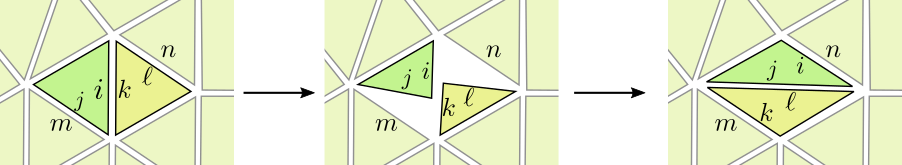

In [27]:
def flip_edge(adj,i):
    if adj[i] == next_around_triangle(i) or adj[i] == prev_around_triangle(i):
        # flipping an edge that is adjacent to the same triangle on both sides makes no sense
        return False
    j = prev_around_triangle(i)
    k = adj[i]
    l = prev_around_triangle(k)
    n = adj[l]
    adj[i] = n  # it is important that we first update
    adj[n] = i  # these adjacencies, before determining m,
    m = adj[j]  # to treat the case j == n appropriately
    adj[k] = m
    adj[m] = k
    adj[j] = l
    adj[l] = j
    return True

def random_flip(adj):
    random_side = rng.integers(0,len(adj))
    return flip_edge(adj,random_side)

# check that after many triangle flips we still have a valid configuration
adj = fan_triangulation(100)
for _ in range(10000):
    random_flip(adj)   
is_sphere_triangulation(adj)

True

Next we should examine detailed balance. First we note that if we had selected $k$ instead of $i$ as the initial side, the move would have been identical. So in this case the proposal probability is $Q( T \to T' ) = 2/(3N)$. Second we need to compare it with the probability $Q( T' \to T)$ of the reverse being proposed. A moment's consideration however will reveal that $Q( T' \to T) = 0$, due to the way in which the flip is always implemented in a clockwise fashion, while the reverse should flip in counter-clockwise direction. We could ensure rejection-free detailed balance $\tilde{Q}(T \to T') = \tilde{Q}(T' \to T)$ for a slightly adapted proposal $\tilde{Q}( T\to T')$ by first flipping a fair coin and based on the outcome performing the flip move clockwise (as presented above) or counterclockwise (the same but in a mirrored fashion). In practice, there is no point in doing so because both types of flip moves result in structurally identical triangulations: only the physically irrelevant labeling of the triangulation is affected by this choice. We thus conclude that modulo relabeling of the triangulations the proposed flip move satisfies detailed balance for the uniform distribution $\pi(T) = 1/Z_{S^2,N}$!

It should be clear from the figure that the flip move does not change the 2-sphere topology. Although we will not prove it here, it is not too difficult to show that any two triangulations of the 2-sphere with $N$ triangles can be obtained from each other by a finite number of flip moves. Hence, the Markov chain we described is irreducible (and aperiodic). This is a special case of a general theorem by Pachner that holds for any dimension $d$, with suitable generalizations of the flip moves (known as Pachner moves or bistellar moves). 

### Visualizing random triangulations

Convergence of the Markov chain to the uniform distribution is therefore guaranteed. What does a uniform random  triangulation look like? It is not so easy to produce a faithful visualization of such a triangulation, because it will be very far from regular. We can make an attempt at embedding the surface in 3D, but as can be seen below the result is not entirely satisfactory (mainly due to limitations of the networkX layout algorithm).

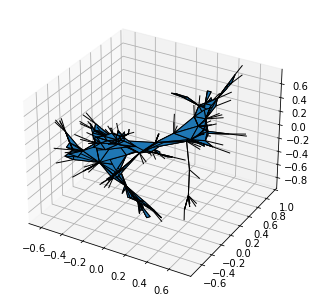

In [29]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def triangulation_edges(triangulation,vertex):
    '''Return a list of vertex-id pairs corresponding to the edges in the triangulation.'''
    return [(vertex[i],vertex[j]) for i,j in enumerate(triangulation) if i < j]

def triangulation_triangles(triangulation,vertex):
    '''Return a list of vertex-id triples corresponding to the triangles in the triangulation.'''
    return [vertex[i:i+3] for i in range(0,len(triangulation),3)]

def plot_triangulation_3d(adj):
    '''Display an attempt at embedding the triangulation in 3d.'''
    num_vert, vertex = vertex_list(adj)
    edges = triangulation_edges(adj,vertex)
    triangles = triangulation_triangles(adj,vertex)
    # use the networkX 3d graph layout algorithm to find positions for the vertices
    pos = np.array(list(nx.spring_layout(nx.Graph(edges),dim=3).values()))
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    tris = Poly3DCollection(pos[triangles])
    tris.set_edgecolor('k')
    ax.add_collection3d(tris)
    ax.set_xlim3d(np.amin(pos[:,0]),np.amax(pos[:,0]))
    ax.set_ylim3d(np.amin(pos[:,1]),np.amax(pos[:,1]))
    ax.set_zlim3d(np.amin(pos[:,2]),np.amax(pos[:,2]))
    plt.show()
    
adj = fan_triangulation(500)
for _ in range(100000):
    random_flip(adj)   
plot_triangulation_3d(adj)

Rather more impressive visualizations can be produced by increasing the number of triangles and using better layout software. Here is a snapshot of a uniform triangulation with $N=4\;000\;000$ triangles produced by [Benedikt Stufler](https://www.dmg.tuwien.ac.at/stufler/gastranim.html). 

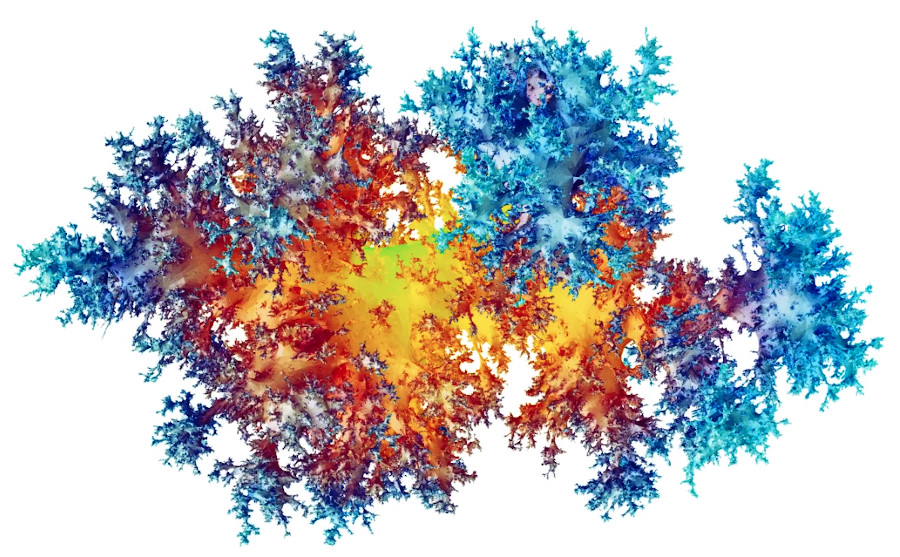

It is remarkable that a model of random geometry with such a simple distribution (uniform distribution on the set of all triangulations) can produce such intricate structures. One may note some similarities with the Ising model at criticality, namely that the configuration displays **fractal features** in the sense that structures are visible at all length scales. Could it be that 2D dynamical triangulations displays critical phenomena without having tuned the system to a continuous phase transition? To find out we should look for the existence of critical exponents when $N$ becomes large.

## Geometric observables

Just like in general relativity physical quantities should not depend on the chosen coordinate system, in dynamical triangulations observables should not depend on the labeling of the triangulation. It is actually not so straightforward to cook up meaningful observables of this type, since the dynamics purely resides in the connectivity of the triangulation. One well-studied observable that exhibits interesting scaling behavior is the **distance profile** $\rho_T(r)$ of the triangulation $T$. It is defined as
$$ \rho_T(r) = \frac{2}{N+4} \sum_x \sum_y \mathbf{1}_{\{d_T(x,y)=r\}},$$
where the sums run over the $(N+4)/2$ vertices of the triangulation $T$ and $d_T(x,y)$ is the **graph distance** between $x$ and $y$ along the edges of the triangulation, i.e. the smallest number of edges in a path connecting $x$ and $y$. Since it involves a sum over all the vertices of the triangulation, it should be clear that $\rho_T(r)$ does not depend on the labeling. The expectation value $\mathbb{E}[\rho_T(r)]$ can also be understood as the expected number of vertices that have distance $r$ from a uniformly chosen vertex in a random triangulation $T$. If $T$ were close to a regular triangulation, i.e. similar to a smooth two-dimensional manifold, then the expected distance profile would grow roughly linearly in $r$ in the regime $1 \ll r \ll \sqrt{N}$.

In [31]:
def vertex_neighbors_list(adj):
    '''Return a list `neighbors` such that `neighbors[v]` is a list of neighbors of the vertex v.'''
    num_vertices, vertex = vertex_list(adj)
    neighbors = [[] for _ in range(num_vertices)]
    for i,j in enumerate(adj):
        neighbors[vertex[i]].append(vertex[j])
    return neighbors

def vertex_distance_profile(adj,max_distance=30):
    '''Return array `profile` of size `max_distance` such that `profile[r]` is the number
    of vertices that have distance r to a randomly chosen initial vertex.'''
    profile = np.zeros((max_distance),dtype=np.int32)
    neighbors = vertex_neighbors_list(adj)
    num_vertices = len(neighbors)
    start = rng.integers(num_vertices) # random starting vertex
    distance = np.full(num_vertices,-1,dtype=np.int32)  # array tracking the known distances (-1 is unknown)
    queue = deque([start])   # use an exploration queue for the breadth-first search
    distance[start] = 0
    profile[0] = 1  # of course there is exactly 1 vertex at distance 0
    while queue:
        current = queue.pop()
        d = distance[current] + 1  # every unexplored neighbour will have this distance
        if d >= max_distance:
            break
        for nbr in neighbors[current]:
            if distance[nbr] == -1:  # this neighboring vertex has not been explored yet
                distance[nbr] = d
                profile[d] += 1
                queue.appendleft(nbr)   # add it to the exploration queue
    return profile
    
def perform_sweeps(adj,t):
    '''Perform t sweeps of flip moves, where 1 sweep is N moves.'''
    for _ in range(len(adj)*t//3):
        random_flip(adj)

def batch_estimate(data,observable,num_batches):
    batch_size = len(data)//num_batches
    values = [observable(data[i*batch_size:(i+1)*batch_size]) for i in range(num_batches)]
    return np.mean(values), np.std(values)/np.sqrt(num_batches-1)
        
sizes = [50,100,200,400]
equilibration_sweeps = 500
measurement_sweeps = 2
measurements = 200
   
mean_profiles = []
for size in sizes:
    adj = fan_triangulation(size)
    perform_sweeps(adj,equilibration_sweeps)
    profiles = []
    for _ in range(measurements):
        perform_sweeps(adj,measurement_sweeps)
        profiles.append(vertex_distance_profile(adj,15))
    mean_profiles.append([batch_estimate(data,np.mean,20) for data in np.transpose(profiles)])

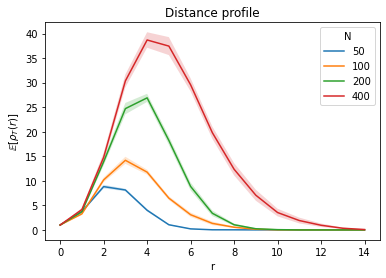

In [32]:
for profile in mean_profiles:
    plt.plot([y[0] for y in profile])
    plt.fill_between(range(len(profile)),[y[0]-y[1] for y in profile],[y[0]+y[1] for y in profile],alpha=0.2)
plt.legend(sizes,title="N")
plt.xlabel("r")
plt.ylabel(r"$\mathbb{E}[\rho_T(r)]$")
plt.title("Distance profile")
plt.show()

It does appear that $\mathbb{E}[\rho_T(r)]$ could converges as $N$ becomes large for fixed $r$, but then the limit looks nothing like linear in $r$. What we are seeing are the fractal properties of the random triangulation and there is a natural critical exponent associated to it, which is called the **fractal dimension** or **Hausdorff dimension** $d_H$, defined as
$$ \lim_{N\to\infty} \mathbb{E}[\rho_T(r)] \sim r^{d_H-1}\qquad\text{as }r\to\infty.$$
The reason for calling it a dimension is that on a deterministic regular lattice of dimension $d$, the Hausdorff dimension would be equal to $d_H = d$. Measuring this exponent is difficult because the approximation $\mathbb{E}[\rho_T(r)] \approx r^{d_H-1}$ is only valid when $1\ll r \ll N^{1/d_H}$.

A more convenient approach goes under the name of **finite-size scaling**, which aims to use the full distance profile in order to deduce the scaling of $r$ relative to the size $N$. It is based on the ansatz that after appropriate rescaling of the $x$ and $y$ axes of the plots of $\mathbb{E}[\rho_T(r)]$ by powers of $N$, the curves should **collapse** in the large-$N$ limit. Using that $\sum_r \mathbb{E}[\rho_T(r)] = N$, the appropriately scaled functions are
$$x \to  N^{1/d_H - 1}\,\mathbb{E}[\rho_T(x N^{1/d_H})].$$
One can then estimate $d_H$ by optimizing the collapse of these functions for several choices of $N$. This you will investigate in the exercises. The following plot already indicates that $d_H$ is close to $4$ (in fact, that $d_H = 4$ can be [proved fully rigorously](https://link.springer.com/article/10.1007/s00222-007-0059-9)).

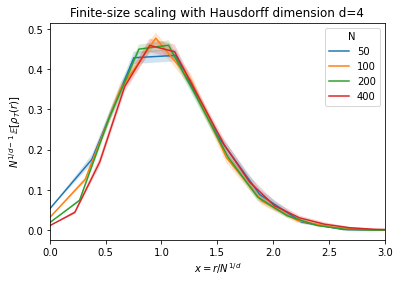

In [50]:
for i, profile in enumerate(mean_profiles):
    rvals = np.arange(len(profile))
    plt.plot(rvals/sizes[i]**0.25,[y[0]/ sizes[i]**0.75 for y in profile])
    plt.fill_between(rvals/sizes[i]**0.25,[(y[0]-y[1])/sizes[i]**0.75 for y in profile],[(y[0]+y[1])/sizes[i]**0.75 for y in profile],alpha=0.2)
plt.legend(sizes,title="N")
plt.xlabel(r"$x = r / N^{1/d}$")
plt.ylabel(r"$N^{1/d-1}\,\mathbb{E}[\rho_T(r)]$")
plt.xlim(0,3)
plt.title("Finite-size scaling with Hausdorff dimension d=4")
plt.show()

### Further reading

Parts of this week's lecture are based on a mini-course I gave several years back on Monte Carlo methods in Dynamical Triangulations. The slides and recordings are available on the [course webpage](https://hef.ru.nl/~tbudd/randgeom/).

A useful textbook on this topic is Ambjørn, Durhuus, Jonsson, [Quantum geometry: a statistical field theory approach](https://www.cambridge.org/core/books/quantum-geometry/943681B03BE0B8D34BC666C22EA18713). Cambridge University Press, 1997. 

For recent developments in related models, you could have a look at Ambjørn, Görlich, Jurkiewicz, Loll, [Nonperturbative quantum gravity](https://dx.doi.org/10.1016/j.physrep.2012.03.007). Physics Reports, 519(4-5), pp.127-210.